#Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings

#KNN

##Model ve Tahmin 

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
x_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [ ]:
knn_model = KNeighborsRegressor().fit(x_train,y_train)
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_model.n_neighbors

5

In [ ]:
knn_model.metric

'minkowski'

In [ ]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [ ]:
knn_model.predict(x_test)[:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

426.6570764525201

##Tuning

In [ ]:
RMSE = []
for k in range (10):
  k = k+1
  knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train,y_train)
  y_pred = y_pred = knn_model.predict(x_test)
  RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
  print("k= {0} rmse= {1}".format(k,np.sqrt(mean_squared_error(y_test,y_pred))))

k= 1 rmse= 455.03925390751965
k= 2 rmse= 415.99629571490965
k= 3 rmse= 420.6765370082348
k= 4 rmse= 428.8564674588792
k= 5 rmse= 426.6570764525201
k= 6 rmse= 423.5071669008732
k= 7 rmse= 414.9361222421057
k= 8 rmse= 413.7094731463598
k= 9 rmse= 417.84419990871265
k= 10 rmse= 421.6252180741266


In [ ]:
RMSE

[455.03925390751965,
 415.99629571490965,
 420.6765370082348,
 428.8564674588792,
 426.6570764525201,
 423.5071669008732,
 414.9361222421057,
 413.7094731463598,
 417.84419990871265,
 421.6252180741266]

Yukarda yaptığımızın otomatikleşmiş hali.

In [ ]:
knn_params = [{"n_neighbors":np.arange(1,30,1)}]

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(x_train,y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(x_train,y_train)

In [ ]:
y_pred = knn_tuned.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

413.7094731463598

#SVR(Support Vector Regression)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
svr_model = SVR("linear").fit(x_train,y_train)

In [ ]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_model.predict(x_train)[:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [ ]:
svr_model.predict(x_test)[:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [ ]:
svr_model.intercept_

array([-80.15196151])

In [ ]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

370.04084185624924

##Tuning

In [ ]:
svr_params = {"C":[0.1,0.5,1,3]}


verbose = 2 olursa durumu raporlayarak çalışır.
n_jobs= -1 olursa tüm işlemci gücnü kullanır.

In [ ]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5).fit(x_train,y_train)

In [ ]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


In [ ]:
svr_cv_model.best_params_

{'C': 0.5}

In [ ]:
svr_tuned = SVR("linear",C = svr_cv_model.best_params_['C']).fit(x_train,y_train)

In [ ]:
y_pred = svr_tuned.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

367.9874739022889

#ANN(Artificial Neural Network)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
scaler = StandardScaler()

###Ölçeklendirme

In [ ]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [ ]:
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_model = MLPRegressor().fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
mlp_model.predict(x_test_scaled)[:5]

array([19.93579611, 41.47444195, 68.42023967, 19.72491546, 23.30466904])

In [ ]:
y_pred = mlp_model.predict(x_test_scaled)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

660.3727064642575

##Tuning

In [ ]:
mlp_params={"alpha":[0.1,0.01,0.02,0.001,0.0001],"hidden_layer_sizes":[(10,20),(5,5),(100,100)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose=2,n_jobs=-1).fit(x_train_scaled,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}

In [ ]:
mlp_tuned = MLPRegressor(alpha= mlp_cv_model.best_params_['alpha'],hidden_layer_sizes=mlp_cv_model.best_params_['hidden_layer_sizes']).fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred = mlp_tuned.predict(x_test_scaled)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

353.6346640000496

#CART(Classification and Regression Tree)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
cart_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)),0.01)

x_grid = x_grid.reshape(len(x_grid),1)

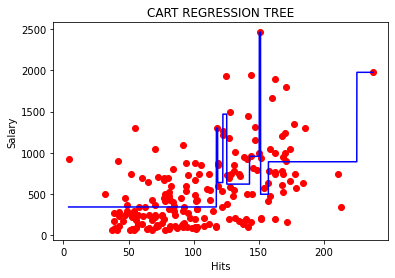

In [ ]:

plt.scatter(x_train,y_train,color="red")
plt.plot(x_grid,cart_model.predict(x_grid),color="blue");
plt.title("CART REGRESSION TREE")
plt.xlabel("Hits")
plt.ylabel("Salary");

Tek değişkenli

In [ ]:
y_pred = cart_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

486.34593105235456

Tüm değişkenlerle

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10).fit(x_train,y_train)
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = cart_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

450.02024012019865

##Tuning

In [ ]:
cart_params = {"max_depth":[2,3,4,5,10,20],"min_samples_split":[2,10,5,50,100]}
cart_model = DecisionTreeRegressor()

In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [ ]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [ ]:
cart_model_tuned = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(x_train,y_train)

In [ ]:
y_pred = cart_model_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

361.0876906511434

#Random Forests

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42).fit(x_train,y_train)

In [ ]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

344.73852779396566

##Tuning

In [ ]:
rf_params = {"max_depth":range(5,8,10),
             "max_features" :[2,5,10],
             "n_estimators":[200,500,1000,2000],
             "min_samples_split":[2,10,80,100]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.4min finished


In [ ]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
rf_model_tuned = RandomForestRegressor(random_state=42,
                                       max_depth=5,
                                       max_features=2,
                                       n_estimators=2000,
                                       min_samples_split=2,).fit(x_train,y_train)

In [ ]:
y_pred = rf_model_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

347.53604198940104

###Değişken Önem Düzeyi

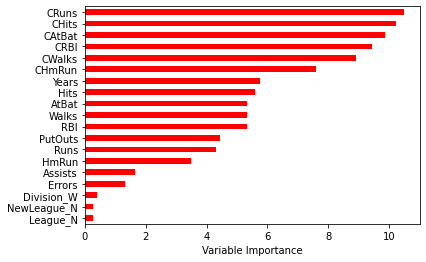

In [ ]:
Importance = pd.DataFrame({"Importance":rf_model_tuned.feature_importances_*100},index=x_train.columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='r')
plt.xlabel("Variable Importance")
plt.gca().legend_=None

#GBM(Gradient Boosting Machines)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)

In [ ]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = gbm_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

354.58015772971777

##Tuning

In [ ]:
gbm_params={"learning_rate":[0.001,0.1,0.01],
            "max_depth":[3,5,8],
            "n_estimators":[100,200,500],
            "subsample":[1,0.5,0.8],
            "loss":["ls","lad","quantile"]}

In [ ]:
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 17.2min finished


In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                    max_depth=3,
                                    n_estimators=100,
                                    subsample=1,
                                    loss="lad",).fit(x_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

323.2665180434182

###Değişken Önem Düzeyi

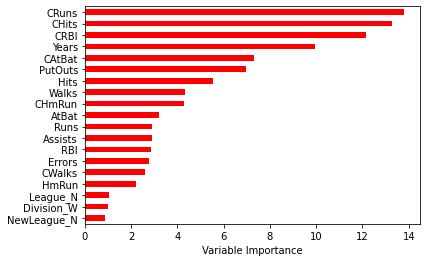

In [ ]:
Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},index=x_train.columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='r')
plt.xlabel("Variable Importance")
plt.gca().legend_=None

#XGBoost

##Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(x_train,y_train)

[20:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

359.91750599447033

##Tuning

Learning rate overfittingi önlemek için kullanılan bir hiperparametredir.

In [ ]:
xgb_params = {"learning_rate":[0.1,0.01,0.5],
              "max_depth":[2,3,5,8],
              "n_estimators":[100,200,500,1000],
              "colsample_bytree":[0.4,0.7,1]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 830 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:  2.1min


[20:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.2min finished


In [ ]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
xgb_tuned = XGBRegressor(learning_rate=0.1,
                         max_depth=2,
                         n_estimators=1000,
                         colsample_bytree=0.4,).fit(x_train,y_train)

[20:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = xgb_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

343.5566804929871

#Light GBM

#Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")

df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_model = LGBMRegressor().fit(x_train,y_train)

In [ ]:
y_pred = lgbm_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

363.8712087611089

In [ ]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_params={"learning_rate":[0.01,0.1,0.5,1],
             "n_estimators": [20,40,100,200,500,1000],
             "max_depth": [_ for _ in range(1,11)]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm_model,lgbm_params,cv=10,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.9min finished


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate=0.1,
                           n_estimators=20,
                           max_depth=6).fit(x_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

371.5044868943621

#CATBoost(Category Boosting)

### Model ve Tahmin

In [ ]:
df = pd.read_csv("Hitters.csv")
df =df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

Y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat_model = CatBoostRegressor().fit(x_train,y_train)

In [ ]:
cat_model.__str__

<method-wrapper '__str__' of CatBoostRegressor object at 0x7f44ad526f90>

In [ ]:
y_pred = cat_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

350.2683163098795

##Tuning

In [ ]:
cat_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.1],
            "depth":[3,6,8]}

In [ ]:
cat_cv_model = GridSearchCV(cat_model,cat_params,verbose=2,n_jobs=-1,cv=5).fit(x_train,y_train)

In [ ]:
cat_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
cat_tuned = CatBoostRegressor(depth=3,
                              learning_rate=0.1,
                              iterations=200,).fit(x_train,y_train)

In [ ]:
y_pred = cat_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

344.3125832615482

#Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [ ]:
def compML(dataset,y,alg):
  Y = df[y]
  X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype('float64')
  X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

  model = alg().fit(x_train,y_train)
  y_pred = cat_tuned.predict(x_test)
  RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
  return RMSE

In [ ]:
compML(df,'Salary',LGBMRegressor)

344.3125832615482

In [ ]:
compML(df,'Salary',SVR)

344.3125832615482